In [13]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

In [5]:
os.getcwd()

'/Users/heosangbeom'

In [6]:
os.chdir("/Users/heosangbeom/Desktop/dacon/[데이콘 Basic] iris dataset")

In [33]:
test = pd.read_csv("iris_test.csv")
train = pd.read_csv("iris_train.csv")
submission = pd.read_csv("sample_submission.csv")

print(train.shape)

(75, 6)


In [32]:
train.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [26]:
pd.pivot_table(train, index="species").iloc[:,1:]

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
species,,,,
setosa,1.420000,0.200000,4.913333,3.346667
versicolor,4.333333,1.353333,6.070000,2.790000
virginica,5.603333,2.006667,6.583333,2.933333


In [36]:
petal = train[["species", "petal length (cm)", "petal width (cm)"]]
sepal = train[["species", "sepal length (cm)", "sepal width (cm)"]]

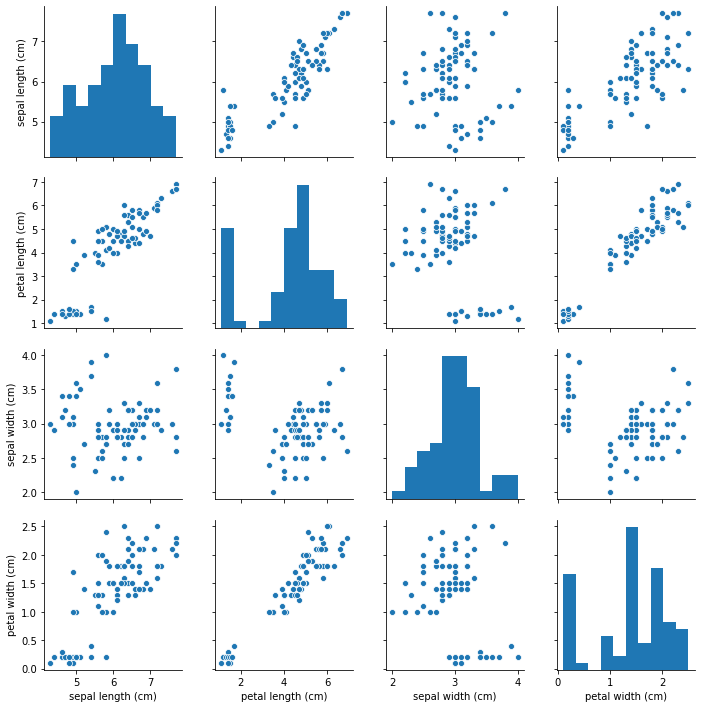

In [40]:
sns.pairplot(train.iloc[:,1:])

In [53]:
corr = train.iloc[:,1:].corr()
corr

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.864852,0.027104,0.763597
petal length (cm),0.864852,1.000000,-0.274590,0.953549
sepal width (cm),0.027104,-0.274590,1.000000,-0.217103
petal width (cm),0.763597,0.953549,-0.217103,1.000000


### 각 피쳐를 가장 잘 설명할 수 있는 변수
* sepal length (cm) : petal length (cm) - 상관계수 0.86
* petal length (cm) : petal width (cm) - 상관계수 0.95
* sepal width (cm) : 설명력있는 변수가 없음
* petal width : petal length (cm) - 상관계수 0.95

## 단순 Width 평균비를 통한 Width prediction

In [137]:
p_width = petal["petal width (cm)"]
s_width = sepal["sepal width (cm)"]

In [138]:
print(f"petal width의 평균 : {np.mean(y1):.2f}")
print(f"sepal width의 평균 : {np.mean(y2):.2f}")

p_mean = np.mean(y1)
s_mean = np.mean(y2)

petal width의 평균 : 1.38
sepal width의 평균 : 2.96


정의하려는 회귀식
> $width = a*x + e$
> * 회귀식의 기울기 $a$는 petal width 평균에 대한 sepal width의 비율. 

In [88]:
a = s_mean / p_mean
a

2.137764932562621

In [139]:
# gaussian random error 생성 
e_s = np.random.normal(0,0.1, len(train))
e_p = np.random.normal(0, 0.01, len(train))

In [140]:
predict_sepal_width = a*p_width + e_s
predict_petal_width = 1/a*s_width + e_p

In [141]:
def MAE(true, pred):
    score = np.mean(np.abs(true-pred))
    return score

real_sepal_width = sepal["sepal width (cm)"].copy()
real_petal_width = petal["petal width (cm)"].copy()

mean_error_sepal = MAE(real_sepal_width, predict_sepal_width)
mean_error_petal = MAE(real_petal_width, predict_petal_width)

print(f"sepal width 방정식의 평균 에러는 {mean_error_sepal:.2f}cm 입니다.")
print(f"petal width 방정식의 평균 에러는 {mean_error_petal:.2f}cm 입니다.")

sepal width 방정식의 평균 에러는 1.23cm 입니다.
petal width 방정식의 평균 에러는 0.58cm 입니다.


In [142]:
submission["petal width (cm)"] = predict_petal_width 
submission["sepal width (cm)"] = predict_sepal_width 

In [144]:
submission.to_csv("submission.csv", index=False)